In [47]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.transforms import ScaledTranslation
from matplotlib.colors import LogNorm
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [2]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [3]:
DAY22 = simple_read('C:/Users/taiwoajayi/Downloads/ACTIVATE-mrg01-HU25_merge_20220618_R0.ict')
DAY22

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Pitch_THORNHILL,Roll_THORNHILL,True_Heading_THORNHILL,True_Air_Speed_THORNHILL,...,IWC_VOIGT_2DS-VArm,Ice_Flag_VOIGT_2DS-VArm,N-total_VOIGT_2DS-VArm,N-liquid_VOIGT_2DS-VArm,N-ice_VOIGT_2DS-VArm,ED-total_VOIGT_2DS-VArm,ED-liquid_VOIGT_2DS-VArm,ED-ice_VOIGT_2DS-VArm,MVD-total_VOIGT_2DS-VArm,MVD-liquid_VOIGT_2DS-VArm
0,2022-06-18 12:05:15,2022-06-18 12:05:16,32.363895,-64.677876,-27.675,-304.380,3.135,-0.915,101.355,69.900,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
1,2022-06-18 12:05:16,2022-06-18 12:05:17,32.363781,-64.677203,-27.585,-294.980,5.225,-1.325,101.575,71.885,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
2,2022-06-18 12:05:17,2022-06-18 12:05:18,32.363647,-64.676419,-27.395,-275.485,7.920,-1.880,101.350,75.070,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
3,2022-06-18 12:05:18,2022-06-18 12:05:19,32.363513,-64.675617,-26.830,-244.110,10.130,-1.380,102.005,78.310,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
4,2022-06-18 12:05:19,2022-06-18 12:05:20,32.363380,-64.674799,-25.415,-206.905,11.145,-0.670,103.935,81.050,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11896,2022-06-18 15:23:31,2022-06-18 15:23:32,36.887379,-76.206837,-20.215,63.355,7.865,-1.590,35.315,64.955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11897,2022-06-18 15:23:32,2022-06-18 15:23:33,36.887785,-76.206436,-23.290,57.495,8.775,-2.570,34.805,62.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11898,2022-06-18 15:23:33,2022-06-18 15:23:34,36.888189,-76.206041,-25.880,65.460,9.515,-4.090,33.625,61.780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11899,2022-06-18 15:23:34,2022-06-18 15:23:35,36.888590,-76.205652,-28.055,62.725,11.190,-3.270,32.545,61.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(DAY22)

['Time_Start',
 'Time_Stop',
 'Latitude_THORNHILL',
 'Longitude_THORNHILL',
 'GPS_Altitude_THORNHILL',
 'Pressure_Altitude_THORNHILL',
 'Pitch_THORNHILL',
 'Roll_THORNHILL',
 'True_Heading_THORNHILL',
 'True_Air_Speed_THORNHILL',
 'Static_Air_Temp_THORNHILL',
 'IR_Surf_Temp_THORNHILL',
 'Static_Pressure_THORNHILL',
 'WSPD_ms-1_THORNHILL',
 'WDIR_deg_THORNHILL',
 'U_ms-1_THORNHILL',
 'V_ms-1_THORNHILL',
 'w_ms-1_THORNHILL',
 'H2O_DLH_DISKIN',
 'RHi_DLH_DISKIN',
 'RHw_DLH_DISKIN',
 'Date_CORRAL',
 'LegIndex_CORRAL',
 'O3_ppbv_DISKIN',
 'CO_ppm_DISKIN',
 'CH4_ppm_DISKIN',
 'CO2_ppm_DISKIN',
 'InletFlag_LARGE_ZIEMBA',
 'CNgt3nm_ZIEMBA',
 'CNgt10nm_ZIEMBA',
 'CNgt10nm_nonvol_ZIEMBA',
 'IntegN_100to1000nm_LAS_ZIEMBA',
 'IntegS_100to1000nm_LAS_ZIEMBA',
 'IntegV_100to1000nm_LAS_ZIEMBA',
 'IntegN_gt1000nm_LAS_ZIEMBA',
 'IntegS_gt1000nm_LAS_ZIEMBA',
 'IntegV_gt1000nm_LAS_ZIEMBA',
 'nLAS_AmmSO4_ZIEMBA',
 'sLAS_AmmSO4_ZIEMBA',
 'vLAS_AmmSO4_ZIEMBA',
 'nSMPS_ZIEMBA',
 'sSMPS_ZIEMBA',
 'vSMPS_ZIEMBA

In [30]:
Day = DAY22[DAY22['LWC_VOIGT_FCDP']*1000 <= 0.02]
Day

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Pitch_THORNHILL,Roll_THORNHILL,True_Heading_THORNHILL,True_Air_Speed_THORNHILL,...,IWC_VOIGT_2DS-VArm,Ice_Flag_VOIGT_2DS-VArm,N-total_VOIGT_2DS-VArm,N-liquid_VOIGT_2DS-VArm,N-ice_VOIGT_2DS-VArm,ED-total_VOIGT_2DS-VArm,ED-liquid_VOIGT_2DS-VArm,ED-ice_VOIGT_2DS-VArm,MVD-total_VOIGT_2DS-VArm,MVD-liquid_VOIGT_2DS-VArm
0,2022-06-18 12:05:15,2022-06-18 12:05:16,32.363895,-64.677876,-27.675,-304.380,3.135,-0.915,101.355,69.900,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
1,2022-06-18 12:05:16,2022-06-18 12:05:17,32.363781,-64.677203,-27.585,-294.980,5.225,-1.325,101.575,71.885,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
2,2022-06-18 12:05:17,2022-06-18 12:05:18,32.363647,-64.676419,-27.395,-275.485,7.920,-1.880,101.350,75.070,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
3,2022-06-18 12:05:18,2022-06-18 12:05:19,32.363513,-64.675617,-26.830,-244.110,10.130,-1.380,102.005,78.310,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
4,2022-06-18 12:05:19,2022-06-18 12:05:20,32.363380,-64.674799,-25.415,-206.905,11.145,-0.670,103.935,81.050,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11102,2022-06-18 15:10:17,2022-06-18 15:10:18,36.915429,-75.284668,883.900,2724.690,1.135,-0.795,272.385,132.115,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
11103,2022-06-18 15:10:18,2022-06-18 15:10:19,36.915402,-75.286064,875.745,2696.530,1.030,-0.605,272.350,131.980,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
11104,2022-06-18 15:10:19,2022-06-18 15:10:20,36.915375,-75.287462,867.290,2668.360,0.925,-0.185,272.360,131.930,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
11105,2022-06-18 15:10:20,2022-06-18 15:10:21,36.915350,-75.288859,858.575,2645.590,0.930,0.130,272.465,131.860,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


In [31]:
Day['3/10'] = Day['CNgt3nm_ZIEMBA']/Day['CNgt10nm_ZIEMBA']
Day

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Pitch_THORNHILL,Roll_THORNHILL,True_Heading_THORNHILL,True_Air_Speed_THORNHILL,...,Ice_Flag_VOIGT_2DS-VArm,N-total_VOIGT_2DS-VArm,N-liquid_VOIGT_2DS-VArm,N-ice_VOIGT_2DS-VArm,ED-total_VOIGT_2DS-VArm,ED-liquid_VOIGT_2DS-VArm,ED-ice_VOIGT_2DS-VArm,MVD-total_VOIGT_2DS-VArm,MVD-liquid_VOIGT_2DS-VArm,3/10
0,2022-06-18 12:05:15,2022-06-18 12:05:16,32.363895,-64.677876,-27.675,-304.380,3.135,-0.915,101.355,69.900,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.342836
1,2022-06-18 12:05:16,2022-06-18 12:05:17,32.363781,-64.677203,-27.585,-294.980,5.225,-1.325,101.575,71.885,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.338665
2,2022-06-18 12:05:17,2022-06-18 12:05:18,32.363647,-64.676419,-27.395,-275.485,7.920,-1.880,101.350,75.070,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.318143
3,2022-06-18 12:05:18,2022-06-18 12:05:19,32.363513,-64.675617,-26.830,-244.110,10.130,-1.380,102.005,78.310,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.359817
4,2022-06-18 12:05:19,2022-06-18 12:05:20,32.363380,-64.674799,-25.415,-206.905,11.145,-0.670,103.935,81.050,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.344486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11102,2022-06-18 15:10:17,2022-06-18 15:10:18,36.915429,-75.284668,883.900,2724.690,1.135,-0.795,272.385,132.115,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.362738
11103,2022-06-18 15:10:18,2022-06-18 15:10:19,36.915402,-75.286064,875.745,2696.530,1.030,-0.605,272.350,131.980,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.382630
11104,2022-06-18 15:10:19,2022-06-18 15:10:20,36.915375,-75.287462,867.290,2668.360,0.925,-0.185,272.360,131.930,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.389296
11105,2022-06-18 15:10:20,2022-06-18 15:10:21,36.915350,-75.288859,858.575,2645.590,0.930,0.130,272.465,131.860,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.384756


In [98]:
# Extract '3/10' and 'Tme' into a new DataFrame
selected_columns = Day[['Time_Start', 'Time_Stop', '3/10']]

# Display the new DataFrame
selected_columns = selected_columns.dropna()  #dropping NaN values
selected_columns

,Time_Start,Time_Stop,3/10
0,2022-06-18 12:05:15,2022-06-18 12:05:16,1.342836
1,2022-06-18 12:05:16,2022-06-18 12:05:17,1.338665
2,2022-06-18 12:05:17,2022-06-18 12:05:18,1.318143
3,2022-06-18 12:05:18,2022-06-18 12:05:19,1.359817
4,2022-06-18 12:05:19,2022-06-18 12:05:20,1.344486
...,...,...,...
11102,2022-06-18 15:10:17,2022-06-18 15:10:18,1.362738
11103,2022-06-18 15:10:18,2022-06-18 15:10:19,1.382630
11104,2022-06-18 15:10:19,2022-06-18 15:10:20,1.389296
11105,2022-06-18 15:10:20,2022-06-18 15:10:21,1.384756


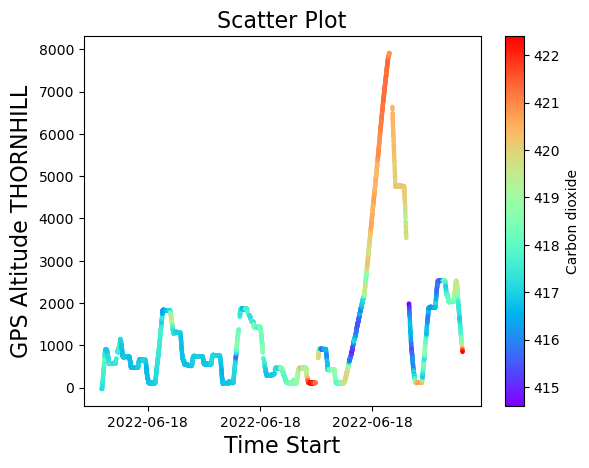

In [79]:
# Create a plot
fig, ax = plt.subplots()

# Create a scatter plot with two distinct colors and markers
#color code by carbon dioxide
sc = ax.scatter(Day['Time_Start'], Day['GPS_Altitude_THORNHILL'], c=Day['CO2_ppm_DISKIN'], cmap='rainbow', s=5)
plt.title("Scatter Plot", fontsize=16)
plt.xlabel("Time Start", fontsize=16)
plt.ylabel("GPS Altitude THORNHILL", fontsize=16)

# Create a colorbar using the scatter object (sc) as the mappable
cbar = plt.colorbar(sc)
cbar.set_label(label='Carbon dioxide')

# Adjust the number of x-axis tickers
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
ax.xaxis.set_minor_locator(ticker.NullLocator())

plt.show()


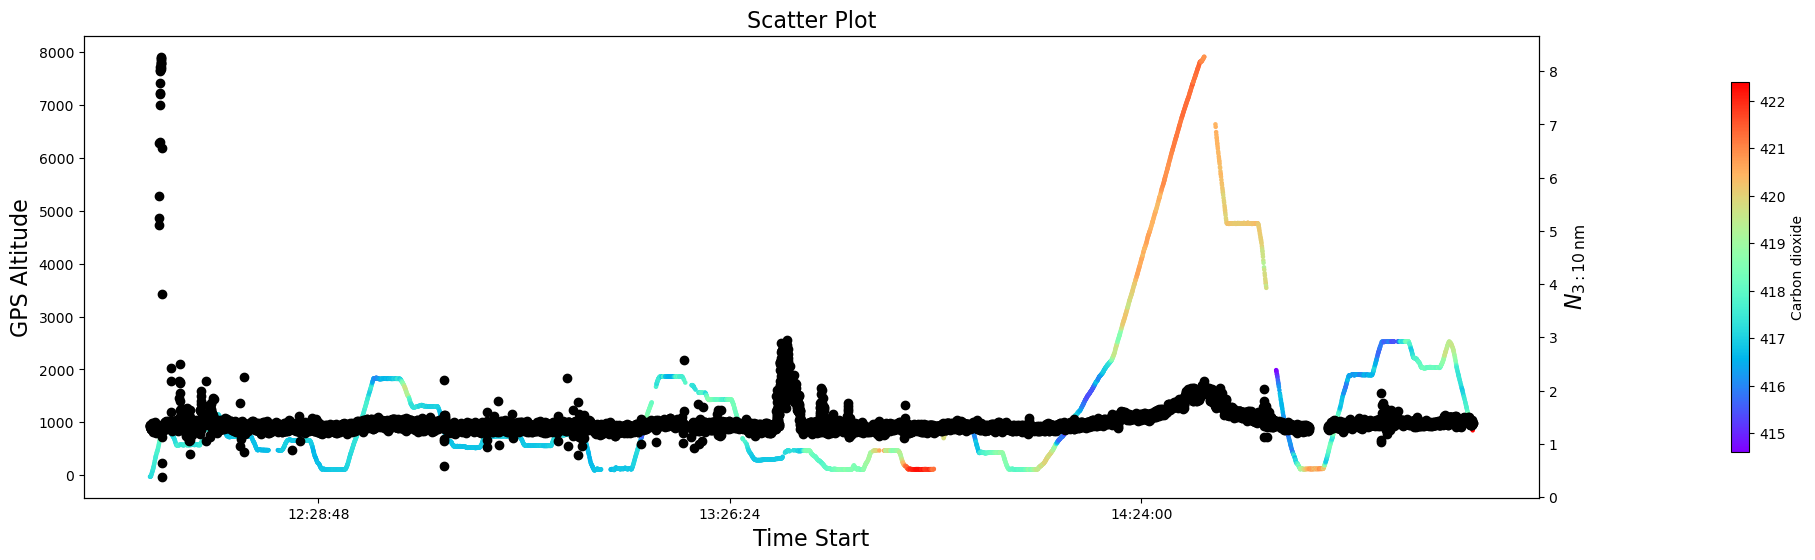

In [104]:
# Create a plot
fig, ax = plt.subplots(figsize = (25,6))

# Create a scatter plot with two distinct colors and markers
sc = ax.scatter(Day['Time_Start'], Day['GPS_Altitude_THORNHILL'], c=Day['CO2_ppm_DISKIN'], cmap='rainbow', s=5)

# Create a twin x-axis
ax1 = ax.twinx()

# Plot the second set of data on the twin axis
ax1.scatter(selected_columns['Time_Start'], selected_columns['3/10'], color="black")

# Set the title and labels for the axes
ax.set_title("Scatter Plot", fontsize=16)
ax.set_xlabel("Time Start", fontsize=16)
ax.set_ylabel("GPS Altitude", fontsize=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax1.set_ylabel(r'$N_{3:10\,\mathrm{nm}}$', fontsize=16)
# Create a colorbar using the scatter object (sc) as the mappable
cbar = plt.colorbar(sc, ax=ax,  orientation='vertical', label='Altitude (m)', pad = 0.099, shrink = 0.8)
cbar.set_label(label='Carbon dioxide')

# Adjust the number of x-axis tickers
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
ax.xaxis.set_minor_locator(ticker.NullLocator())

plt.show()


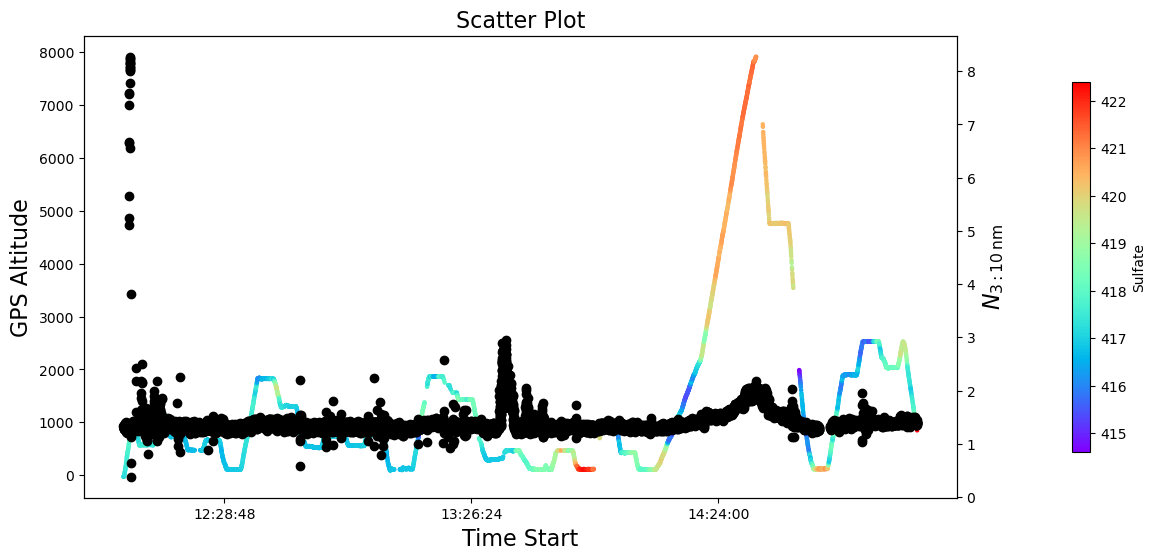

In [108]:
# Create a plot
fig, ax = plt.subplots(figsize = (15,6))

# Create a scatter plot with two distinct colors and markers
sc = ax.scatter(Day['Time_Start'], Day['GPS_Altitude_THORNHILL'], c=Day['CO2_ppm_DISKIN'], cmap='rainbow', s=5)

# Create a twin x-axis
ax1 = ax.twinx()

# Plot the second set of data on the twin axis
ax1.scatter(Day['Time_Start'], Day['3/10'], marker ='o', color="black")

# Set the title and labels for the axes
ax.set_title("Scatter Plot", fontsize=16)
ax.set_xlabel("Time Start", fontsize=16)
ax.set_ylabel("GPS Altitude", fontsize=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax1.set_ylabel(r'$N_{3:10\,\mathrm{nm}}$', fontsize=16)
# Create a colorbar using the scatter object (sc) as the mappable
cbar = plt.colorbar(sc, ax=ax,  orientation='vertical', label='Altitude (m)', pad = 0.099, shrink = 0.8)
cbar.set_label(label='Sulfate')

# Adjust the number of x-axis tickers
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
ax.xaxis.set_minor_locator(ticker.NullLocator())

plt.show()


In [7]:
nbins = 15
bins2b = np.linspace(Day.GPS_Altitude_THORNHILL.min(), Day.GPS_Altitude_THORNHILL.max(), nbins+1)
Day['Bins'] = pd.cut(Day['GPS_Altitude_THORNHILL'], bins2b)
Day_subset_median= Day.groupby('Bins').median()
Day_subset_median

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Pitch_THORNHILL,Roll_THORNHILL,True_Heading_THORNHILL,True_Air_Speed_THORNHILL,...,Ice_Flag_VOIGT_2DS-VArm,N-total_VOIGT_2DS-VArm,N-liquid_VOIGT_2DS-VArm,N-ice_VOIGT_2DS-VArm,ED-total_VOIGT_2DS-VArm,ED-liquid_VOIGT_2DS-VArm,ED-ice_VOIGT_2DS-VArm,MVD-total_VOIGT_2DS-VArm,MVD-liquid_VOIGT_2DS-VArm,3/10
Bins,,,,,,,,,,,,,,,,,,,,,
"(-27.675, 506.763]",2022-06-18 13:41:29.500,2022-06-18 13:41:30.500,35.728021,-70.377221,189.7000,632.6275,6.2525,-0.9600,298.0375,114.2025,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.303860
"(506.763, 1041.2]",2022-06-18 12:53:30.500,2022-06-18 12:53:31.500,34.043287,-67.414756,727.7375,2140.5200,6.2050,-1.0950,298.2150,118.7275,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.327179
"(1041.2, 1575.638]",2022-06-18 13:23:36.000,2022-06-18 13:23:37.000,35.129678,-69.303181,1310.2200,4030.8500,6.1450,-1.1650,298.6650,123.0100,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.353161
"(1575.638, 2110.076]",2022-06-18 14:17:58.500,2022-06-18 14:17:59.500,36.603454,-72.000210,1864.0750,5812.4750,6.0325,-1.2600,273.2375,128.5000,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.379119
"(2110.076, 2644.513]",2022-06-18 15:00:26.500,2022-06-18 15:00:27.500,36.929125,-74.419925,2425.5250,7585.3950,4.0175,-1.3000,268.2825,149.9850,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.408018
"(2644.513, 3178.951]",2022-06-18 14:21:43.000,2022-06-18 14:21:44.000,36.611094,-71.962962,2917.0400,9168.8700,9.2500,-26.1200,264.0300,127.4800,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.518062
"(3178.951, 3713.389]",2022-06-18 14:22:54.500,2022-06-18 14:22:55.500,36.585473,-71.990653,3439.3200,10747.8000,9.2950,-19.9250,189.8425,128.3850,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.504498
"(3713.389, 4247.826]",2022-06-18 14:23:58.500,2022-06-18 14:23:59.500,36.568782,-71.917613,3971.2750,12434.5500,9.4975,-27.2550,93.4400,130.9075,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.508085
"(4247.826, 4782.264]",2022-06-18 14:37:49.000,2022-06-18 14:37:50.000,36.792378,-72.382553,4758.3400,14741.7000,4.3600,-1.1600,296.5400,167.5950,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,1.540036


In [8]:
Day_subset_25 = Day_subset_median - Day.groupby('Bins').quantile(.25)
Day_subset_25
Day_subset_75 = Day.groupby('Bins').quantile(.75) - Day_subset_median
Day_subset_75

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Pitch_THORNHILL,Roll_THORNHILL,True_Heading_THORNHILL,True_Air_Speed_THORNHILL,...,Ice_Flag_VOIGT_2DS-VArm,N-total_VOIGT_2DS-VArm,N-liquid_VOIGT_2DS-VArm,N-ice_VOIGT_2DS-VArm,ED-total_VOIGT_2DS-VArm,ED-liquid_VOIGT_2DS-VArm,ED-ice_VOIGT_2DS-VArm,MVD-total_VOIGT_2DS-VArm,MVD-liquid_VOIGT_2DS-VArm,3/10
Bins,,,,,,,,,,,,,,,,,,,,,
"(-27.675, 506.763]",0 days 00:21:05.250000128,0 days 00:21:05.250000128,0.660805,1.901486,232.46500,688.9200,0.38750,0.57000,3.72500,2.82750,...,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.029037
"(506.763, 1041.2]",0 days 00:12:44.749999872,0 days 00:12:44.749999872,0.461211,1.804525,39.59625,220.6000,0.70000,0.51500,3.13125,2.19375,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.033695
"(1041.2, 1575.638]",0 days 00:51:34,0 days 00:51:34,1.426146,2.495865,123.08000,457.3300,0.97000,0.72500,1.16000,5.59000,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.033591
"(1575.638, 2110.076]",0 days 00:37:33.250000128,0 days 00:37:33.250000128,0.323750,3.173831,43.04000,163.4425,0.29250,0.52000,28.10875,18.85500,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.023588
"(2110.076, 2644.513]",0 days 00:02:13.749999872,0 days 00:02:13.749999872,0.003152,0.303198,101.85250,285.7675,3.34000,0.74250,0.62125,7.21125,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.038111
"(2644.513, 3178.951]",0 days 00:20:09.500000,0 days 00:20:09.500000,0.331829,0.025406,127.61000,380.4200,0.07500,25.09250,37.85000,24.06750,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.035172
"(3178.951, 3713.389]",0 days 00:18:30.749999872,0 days 00:18:30.749999872,0.360735,0.007524,134.70250,435.5000,0.19000,13.32375,72.02250,41.87375,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.025598
"(3713.389, 4247.826]",0 days 00:16:58.250000128,0 days 00:16:58.250000128,0.368353,0.021991,130.36000,411.5250,0.06625,0.82875,203.73250,38.22750,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.023457
"(4247.826, 4782.264]",0 days 00:01:33,0 days 00:01:33,0.075476,0.132465,4.65000,48.8000,0.68500,0.77500,0.43500,9.46000,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.038308


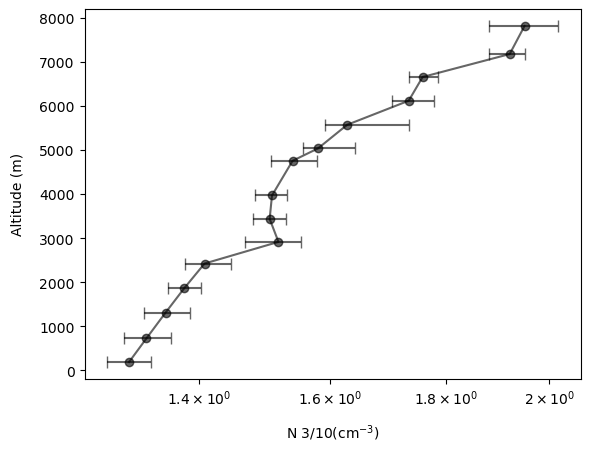

In [9]:
fig, ax = plt.subplots()
plt.rcParams['font.size'] = '10'
ax.errorbar(Day_subset_median['3/10'], Day_subset_median['GPS_Altitude_THORNHILL'], xerr=[Day_subset_25['3/10'], Day_subset_75['3/10']], marker='o', linestyle='-', capsize=4, alpha=.6, color="black", label = '3/10')
ax.set_ylabel('Altitude (m)', labelpad=11)
ax.set_xlabel('N 3/10(cm$^{-3}$)', labelpad=11)
ax.set_xscale('log')
# Reduce the number of x-axis tickers to 2 for ax[0]
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.xaxis.set_minor_locator(ticker.NullLocator())

In [10]:
'''fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(Day_subset_median['CNgt10nm_ZIEMBA'], Day_subset_median['GPS_Altitude_THORNHILL'], xerr=[Day_subset_25['CNgt10nm_ZIEMBA'], Day_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(Day_subset_median['nSMPS_ZIEMBA'], Day_subset_median['GPS_Altitude_THORNHILL'], xerr=[Day_subset_25['CNgt10nm_ZIEMBA'], Day_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(Day_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], Day_subset_median['GPS_Altitude_THORNHILL'], xerr=[Day_subset_25['CNgt10nm_ZIEMBA'], Day_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(Day_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], Day_subset_median['GPS_Altitude_THORNHILL'], xerr=[Day_subset_25['CNgt10nm_ZIEMBA'], Day_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())


# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/02_18:36 - 18:53 UTC', ha='left', va='top', fontsize=8)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()'''


'fig, ax = plt.subplots(1, 4, sharey=\'all\')\nplt.rcParams[\'font.size\'] = \'10\'\nax[0].errorbar(Day_subset_median[\'CNgt10nm_ZIEMBA\'], Day_subset_median[\'GPS_Altitude_THORNHILL\'], xerr=[Day_subset_25[\'CNgt10nm_ZIEMBA\'], Day_subset_75[\'CNgt10nm_ZIEMBA\']], marker=\'o\', linestyle=\'-\', capsize=4, alpha=.6, color="darkorange", label = \'>10nm\')\nax[1].errorbar(Day_subset_median[\'nSMPS_ZIEMBA\'], Day_subset_median[\'GPS_Altitude_THORNHILL\'], xerr=[Day_subset_25[\'CNgt10nm_ZIEMBA\'], Day_subset_75[\'CNgt10nm_ZIEMBA\']], marker=\'o\', linestyle=\'-\', capsize=4, alpha=.6, color="darkorange", label = \'<100nm\')\nax[2].errorbar(Day_subset_median[\'IntegN_100to1000nm_LAS_ZIEMBA\'], Day_subset_median[\'GPS_Altitude_THORNHILL\'], xerr=[Day_subset_25[\'CNgt10nm_ZIEMBA\'], Day_subset_75[\'CNgt10nm_ZIEMBA\']], marker=\'o\', linestyle=\'-\', capsize=4, alpha=.6, color="darkorange", label = \'100nm - 1um\')\nax[3].errorbar(Day_subset_median[\'IntegN_gt1000nm_LAS_ZIEMBA\'], Day_subset_m

Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-02]')

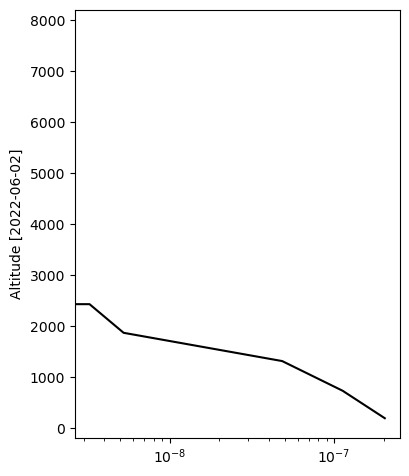

In [11]:

fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(Day_subset_median['LWC_VOIGT_FCDP'], Day_subset_median['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-02]')

Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-02]')

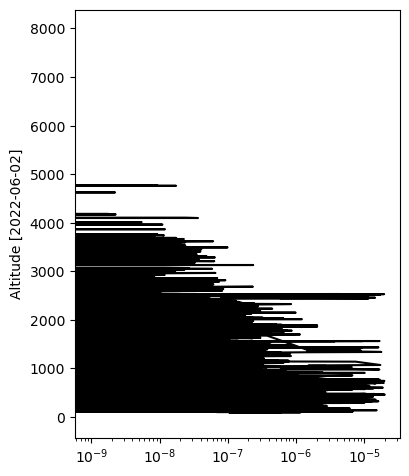

In [12]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(Day['LWC_VOIGT_FCDP'], Day['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-02]')